In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def poisson_spike_train(rate, duration, refractory_period):
    dt = 1  # Time step size in ms
    num_steps = int(duration / dt)
    spike_train = np.zeros(num_steps)

    time = 0
    last_spike_time = -np.inf  # Time of the last spike

    while time < duration:
        # Generate Poisson spikes
        spike = np.random.rand() < rate * dt / 1000

        # Check if refractory period has passed since last spike
        if time - last_spike_time > refractory_period:
            if spike:
                spike_train[int(time)] = 1
                last_spike_time = time

        time += dt

    return spike_train

# Example usage
rate = 100  # Firing rate in Hz
duration = 10000  # Duration of spike train in ms
refractory_period = 10  # Refractory period in ms
spike_train = poisson_spike_train(rate, duration, refractory_period)

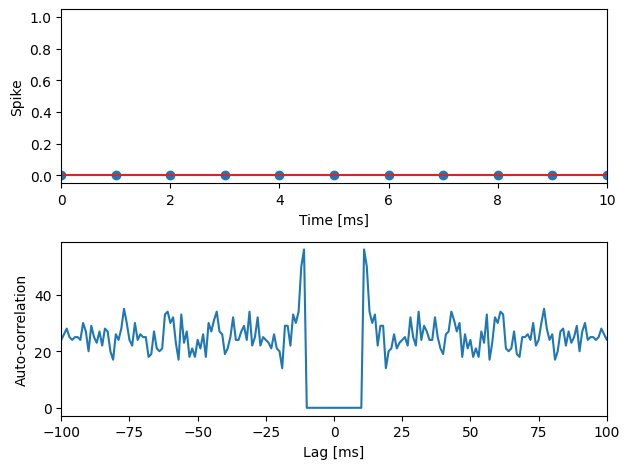

In [8]:
auto_corr = np.correlate(spike_train, spike_train, mode='full')
lags = np.arange(-len(spike_train)+1, len(spike_train))

# Remove lag at point 0
zero_index = len(spike_train) - 1
auto_corr = np.delete(auto_corr, zero_index)
lags = np.delete(lags, zero_index)

# Plot the spike train and auto-correlation
time = np.arange(0, duration)

plt.subplot(2, 1, 1)
plt.stem(time, spike_train)
plt.xlabel('Time [ms]')
plt.ylabel('Spike')
plt.xlim(0, 10)

plt.subplot(2, 1, 2)
plt.plot(lags, auto_corr)
plt.xlabel('Lag [ms]')
plt.ylabel('Auto-correlation')
plt.xlim(-100, 100)
plt.tight_layout()
plt.show()

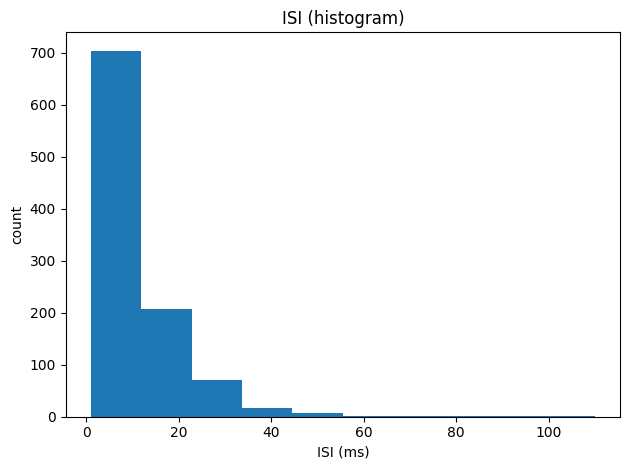

In [6]:
isi_2 = np.diff(np.where(spike_train == 1)[0]) 


plt.hist(isi_2)
plt.xlabel('ISI (ms)')
plt.ylabel('count')
plt.title('ISI (histogram)')

plt.tight_layout()
plt.show()